In [53]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [30]:
data = pd.read_excel('../Datasets/computers.xls')

In [31]:
data['Gender'].value_counts()

Male      10415
Female    10368
Name: Gender, dtype: int64

In [32]:
data['Age'].describe()

count    20783.000000
mean        44.273108
std         17.070678
min         18.000000
25%         31.000000
50%         41.000000
75%         55.000000
max        107.000000
Name: Age, dtype: float64

In [33]:
data['Comp'].describe()

count    20783.000000
mean        11.099937
std          7.533505
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         37.000000
Name: Comp, dtype: float64

# Sampling 450 people from the data

In [38]:
random_sample = data.sample(n=450)
random_sample = random_sample.reset_index()
random_sample = random_sample.drop('index',axis=1)

In [39]:
random_sample['Gender'].value_counts()

Male      239
Female    211
Name: Gender, dtype: int64

In [40]:
random_sample['Age'].describe()

count    450.000000
mean      44.806667
std       17.555777
min       18.000000
25%       31.250000
50%       41.000000
75%       54.000000
max       94.000000
Name: Age, dtype: float64

In [41]:
random_sample['Comp'].describe()

count    450.000000
mean      10.968889
std        7.058389
min        0.000000
25%        5.000000
50%       11.000000
75%       16.000000
max       31.000000
Name: Comp, dtype: float64

## randomly assign our SRS of 450 subjects to treatment groups, one for each of the three versions of the ISP's software. Let's denote the versions "1," "2," and "3,"

In [42]:
#didn't work
#random_sample.assign(group = lambda x : random.choice([1,2,3]))['group'].value_counts()

2    450
Name: group, dtype: int64

In [43]:
for i in range(0,450):
    random_sample.loc[i,'group'] = random.choice([1,2,3])
random_sample.group = random_sample.group.astype('int64')

In [51]:
random_sample['group'].value_counts()

2    154
1    153
3    143
Name: group, dtype: int64

## To compare the distribution of age among the three treatment groups, we'll create side-by-side boxplots of age by treatment.

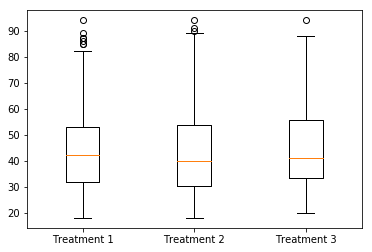

In [54]:
ttt_1 = random_sample.loc[random_sample['group']==1]['Age']
ttt_2 = random_sample.loc[random_sample['group']==2]['Age']
ttt_3 = random_sample.loc[random_sample['group']==3]['Age']
plt.boxplot([ttt_1, ttt_2, ttt_3],\
            labels=['Treatment 1', 'Treatment 2', 'Treatment 3'])
plt.show()

In [56]:
ttt_1.describe()

count    153.000000
mean      44.261438
std       17.024275
min       18.000000
25%       32.000000
50%       42.000000
75%       53.000000
max       94.000000
Name: Age, dtype: float64

In [57]:
ttt_2.describe()

count    154.000000
mean      44.461039
std       19.148929
min       18.000000
25%       30.250000
50%       40.000000
75%       53.750000
max       94.000000
Name: Age, dtype: float64

In [58]:
ttt_3.describe()

count    143.000000
mean      45.762238
std       16.365955
min       20.000000
25%       33.500000
50%       41.000000
75%       55.500000
max       94.000000
Name: Age, dtype: float64

## To compare the distribution of computer time among the three treatment groups, we'll create side-by-side boxplots of computer time by treatment.

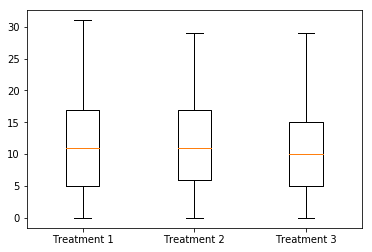

In [59]:
ttt_c_1 = random_sample.loc[random_sample['group']==1]['Comp']
ttt_c_2 = random_sample.loc[random_sample['group']==2]['Comp']
ttt_c_3 = random_sample.loc[random_sample['group']==3]['Comp']
plt.boxplot([ttt_c_1, ttt_c_2, ttt_c_3],\
            labels=['Treatment 1', 'Treatment 2', 'Treatment 3'])
plt.show()

In [60]:
ttt_c_1.describe()

count    153.000000
mean      11.163399
std        7.355143
min        0.000000
25%        5.000000
50%       11.000000
75%       17.000000
max       31.000000
Name: Comp, dtype: float64

In [61]:
ttt_c_2.describe()

count    154.000000
mean      11.292208
std        7.351960
min        0.000000
25%        6.000000
50%       11.000000
75%       17.000000
max       29.000000
Name: Comp, dtype: float64

In [62]:
ttt_c_3.describe()

count    143.000000
mean      10.412587
std        6.396884
min        0.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       29.000000
Name: Comp, dtype: float64

## To compare the distribution of gender among the three treatment groups, we'll look at a two-way table of conditional percents:

In [63]:
gender_index = random_sample['Gender'].value_counts().index

In [65]:
group_index = random_sample['group'].value_counts().index

In [67]:
two_way_dict = {}
for i in gender_index:
    loc_dict = {}
    for j in group_index:
        d = random_sample.loc[random_sample['Gender']==i]
        d = d.loc[random_sample['group']==j]
        loc_dict[j] = d.shape[0]
    two_way_dict[i] = loc_dict

In [68]:
two_way_dict

{'Male': {2: 81, 1: 77, 3: 81}, 'Female': {2: 73, 1: 76, 3: 62}}